In this lab we're going to do simple data exploration using Pandas. Our objective is to learn basic operations that aid in visual data exploration.

<br>

First, let's import our required libraries and read in the data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os


cwd = os.getcwd()

#If on MAC, this will likely work
#datadir = '/'.join(cwd.split('/')[0:-1]) + '/data/'
#If on window's machine, explicitly put in data dir
#datadir = 

%matplotlib inline


#Now read in the dataset loansdata.csv
loansData = pd.read_csv('https://spark-public.s3.amazonaws.com/dataanalysis/loansData.csv')

The full schema can be found <a href="https://github.com/herrfz/dataanalysis/blob/master/assignment1/Assignment1.pdf">here</a>, but let's use native Pandas methods to also explore the data. Although not specified above, this csv has row headers and the read_csv function implicitly knows this. <br>

Let's take a look at the column names, in a nicely readable way:

In [4]:
print("Column Names Are:")
print("")

for column_name in loansData.columns:
    print(column_name)

print("")
print('Total # of Columns = {}'.format(len(loansData.columns)))

# Simple Way for number of columns
print(len(loansData.columns))

Column Names Are:

Amount.Requested
Amount.Funded.By.Investors
Interest.Rate
Loan.Length
Loan.Purpose
Debt.To.Income.Ratio
State
Home.Ownership
Monthly.Income
FICO.Range
Open.CREDIT.Lines
Revolving.CREDIT.Balance
Inquiries.in.the.Last.6.Months
Employment.Length

Total # of Columns = 14
14


It is oftentimes helpful to take a quick glance at the first few records (when possible). This is an easy way to discover basic data flaws (i.e., all nulls, misaligned fields, etc.). We can do this in Pandas very easily.

In [5]:
loansData.head() #We transpose it so it will fit in the display window

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
81174,20000,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
99592,19200,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
80059,35000,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
15825,10000,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
33182,12000,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


Next, let's run a quick line to get summary statistics of the numeric fields.

In [7]:
loansData.describe()

,Amount.Requested,Amount.Funded.By.Investors,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months
count,2500.000000,2500.000000,2499.000000,2498.000000,2498.000000,2498.000000
mean,12406.500000,12001.573236,5688.931321,10.075661,15244.559648,0.906325
std,7801.544872,7745.320754,3963.118185,4.508644,18308.549795,1.231036
min,1000.000000,-0.010000,588.500000,2.000000,0.000000,0.000000
25%,6000.000000,6000.000000,3500.000000,7.000000,5585.750000,0.000000
50%,10000.000000,10000.000000,5000.000000,9.000000,10962.000000,0.000000
75%,17000.000000,16000.000000,6800.000000,13.000000,18888.750000,1.000000
max,35000.000000,35000.000000,102750.000000,38.000000,270800.000000,9.000000


Let's now focus on a single column, 'Monthly.Income.' First things first, let's display the first five records of just this field.

In [10]:
#Student input line here
loansData["Monthly.Income"][0:5]

81174     6541.67
99592     4583.33
80059    11500.00
15825     3833.33
33182     3195.00
Name: Monthly.Income, dtype: float64

Let's try and understand the distribution of this field. We can do this using the hist() method and matplotlib.

Text(0.5,1,'Histogram of Monthly Income')

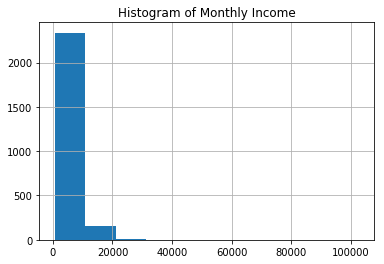

In [13]:
plt.figure()
loansData['Monthly.Income'].hist()
plt.title('Histogram of Monthly Income')

How would you characterize the shape of this distribution? Is there anything we can do to the income variable to make the distribution more bell curved? Let's create a new column in the dataframe called 'Monthly.LogIncome' and print a histogram of it. What might be some advantages of making such a transformation?
<br>


In [16]:
#Student: Add a new column Monthly.LogIncome to the dataset that is the log of the Monthly.Income columne
loansData["Monthly.LogIncome"] = np.log(loansData["Monthly.Income"])

# Another version
loansData["Monthly.LogIncome"] = loansData["Monthly.Income"].map(np.log)

# In Panda, using map the data can be mapped through any function => using map, any function can be applied to the data

Text(0.5,1,'Histogram of Log(Monthly Income)')

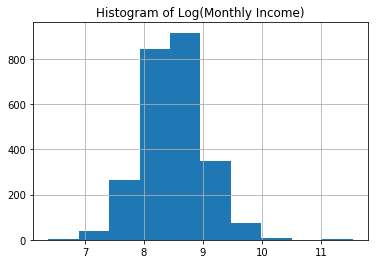

In [15]:
#Now look at the distribution
plt.figure()
loansData['Monthly.LogIncome'].hist()
plt.title('Histogram of Log(Monthly Income)')

Now let's answer some questions about the data.

<b>Q1: What is the cardinality (i.e., # of distinct values) for 'Interest.Rate' and 'FICO.Range'</b>

In [31]:
#Student input code here - hint, the 'describe()' method returns a useful dataframe
print("Version 1")
print(loansData["Interest.Rate"].unique().shape)
print(loansData["FICO.Range"].unique().shape)

# Another version
print("Version 2")
print(len(loansData["Interest.Rate"].unique()), len(loansData["FICO.Range"].unique()))

# Another version
print("Version 3")
loansData[["Interest.Rate", "FICO.Range"]].describe().loc["unique",:]

Version 1
(275,)
(38,)
Version 2
275 38
Version 3


Interest.Rate    275
FICO.Range        38
Name: unique, dtype: object

<b>Q2: What data type did Pandas set fo Interest.Rate? Can we create a new field which is stored as a float?</b>

In [23]:
#Student input code here - show the field type
loansData["Interest.Rate"].dtypes

dtype('O')

In the cell below, create a new field 'Interest.Rate.Num' where 'Interest.Rate' is converted to a float. Hint: this can be done in one line using the .str assessor, strip and astype methods.

In [33]:
#Student input code here - convert field to a float using the '.str' assessor
loansData["Interest.Rate.float"] = loansData["Interest.Rate"].str[:-1].astype(float)

<b>Q3: Can we get a sense of the relationship between monthly income and interest rate? Use the scatter() function from Matplotlib.</b>

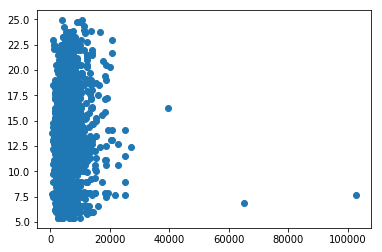

In [40]:
#Student input line here
ir = loansData["Interest.Rate.float"]
mi = loansData["Monthly.Income"]
plt.scatter(mi, ir)

Given the skewed distribution of Income, is this chart visually helpful? Let's try the Log of income instead.

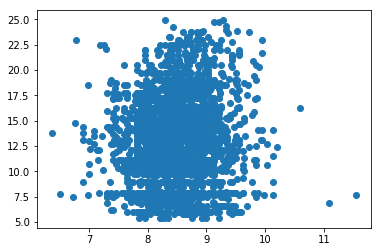

In [41]:
#Student input code here
mli = loansData["Monthly.LogIncome"]
plt.scatter(mli, ir)

<b>Q4: What is the average interest rate for each FICO range?</b> <br>
Hint: use the groupby() method in Pandas.

In [46]:
#Student input code here
loansData["FICO.Range"].describe()

count        2500
unique         38
top       670-674
freq          171
Name: FICO.Range, dtype: object

In [54]:
#fico_grp
loansData.groupby("FICO.Range").mean()["Interest.Rate.float"]

FICO.Range
640-644    15.212000
645-649    14.883333
650-654    15.130000
655-659    14.930000
660-664    18.492480
665-669    17.448069
670-674    16.248480
675-679    15.854699
680-684    15.126688
685-689    14.654855
690-694    14.732071
695-699    14.146863
700-704    13.356870
705-709    12.659851
710-714    12.433125
715-719    11.181935
720-724    11.035789
725-729    10.652979
730-734     9.956170
735-739     9.623538
740-744     9.592264
745-749     9.901667
750-754     8.467705
755-759     8.996087
760-764     8.627609
765-769     7.783333
770-774     6.752941
775-779     8.744091
780-784     7.589286
785-789     8.497895
790-794     7.560500
795-799     8.391538
800-804     7.638462
805-809     7.426364
810-814     8.293750
815-819     6.925000
820-824     7.900000
830-834     7.620000
Name: Interest.Rate.float, dtype: float64